# Testing VAE with Single Point Dataset

## Testing Variational Autoencoder (VAE)

In [1]:
from autoencoders.VAE import VAE as VAE
from experiment_datasets.single_point import generate_single_point
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
import tensorflow as tf

devices = tf.config.list_physical_devices('GPU')

if len(devices) < 1:
    raise Exception("Cannot initialize GPU")

print("GPU configured correctly")

GPU configured correctly


In [3]:
dataset, validation = generate_single_point(16, 16, validation_split=0.0)
INPUT_SHAPE = dataset.shape[1:]
DATASET_SIZE = dataset.shape[0]
VALIDATION_SIZE = validation.shape[0]
print(dataset.shap
print(validation.shape)

SyntaxError: invalid syntax (<ipython-input-3-eebd99bf6e22>, line 6)

In [30]:
vae = VAE(
    layers=2,
    input_shape=INPUT_SHAPE,
    latent_size=8,
    filters=8,
    kernel_size=3,
    name="VAE")
vae.summary()

Model: "Encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_encoder (InputLayer)      [(None, 10, 10, 1)]  0                                            
__________________________________________________________________________________________________
conv1_enc (Conv2D)              (None, 10, 10, 8)    80          input_encoder[0][0]              
__________________________________________________________________________________________________
maxpool1 (MaxPooling2D)         (None, 5, 5, 8)      0           conv1_enc[0][0]                  
__________________________________________________________________________________________________
conv2_enc (Conv2D)              (None, 5, 5, 16)     1168        maxpool1[0][0]                   
____________________________________________________________________________________________

In [31]:
callbacks = [
    #EarlyStopping(monitor='val_loss', patience=50)
]

batch_size = dataset.shape[0] if dataset.shape[0] < 32 else 32

history = vae.train_primitive(
    dataset, 
    validation, 
    epochs=1200,
    batch_size=batch_size,
    callbacks=callbacks
)

========] - 0s 14ms/step - loss: 5.6992 - reconstruction_loss: 5.6693 - kl_loss: 0.0557
Epoch 1049/1200
4/4 [==============================] - 0s 14ms/step - loss: 5.6743 - reconstruction_loss: 5.5844 - kl_loss: 0.0498
Epoch 1050/1200
4/4 [==============================] - 0s 16ms/step - loss: 5.5808 - reconstruction_loss: 5.5310 - kl_loss: 0.0495
Epoch 1051/1200
4/4 [==============================] - 0s 15ms/step - loss: 5.6487 - reconstruction_loss: 5.6050 - kl_loss: 0.0590
Epoch 1052/1200
4/4 [==============================] - 0s 12ms/step - loss: 5.5707 - reconstruction_loss: 5.5004 - kl_loss: 0.0514
Epoch 1053/1200
4/4 [==============================] - 0s 14ms/step - loss: 5.6162 - reconstruction_loss: 5.5491 - kl_loss: 0.0494
Epoch 1054/1200
4/4 [==============================] - 0s 14ms/step - loss: 5.6131 - reconstruction_loss: 5.5668 - kl_loss: 0.0483
Epoch 1055/1200
4/4 [==============================] - 0s 15ms/step - loss: 5.6427 - reconstruction_loss: 5.6259 - kl_loss: 0.

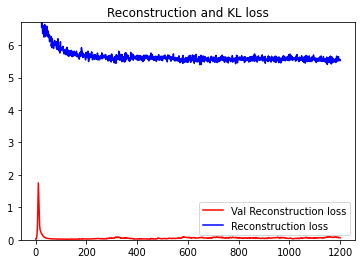

In [38]:
val_rec_loss = history.history['kl_loss']
rec_loss = history.history['reconstruction_loss']

epochs = range(1, len(val_rec_loss) + 1)    

axes = plt.gca()
plt.plot(epochs, val_rec_loss, 'r', label='Val Reconstruction loss')
plt.plot(epochs, rec_loss, 'b', label='Reconstruction loss')
plt.title('Reconstruction and KL loss')
axes.set_ylim([0,6.7])
plt.legend()

In [24]:
print(VALIDATION_SIZE)

20


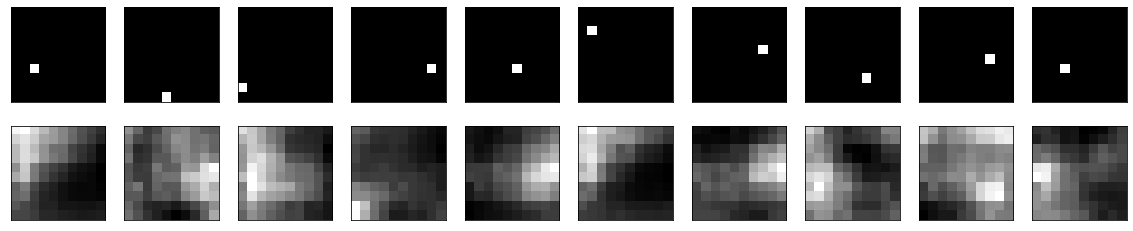

In [35]:
import random
import numpy as np

n = 10
images = np.empty((n, *INPUT_SHAPE))

for i in range(n):
    rand_img = random.randint(0, DATASET_SIZE-1)
    images[i] = dataset[rand_img]

decoded_imgs = vae.predict(images)
#latent = vae.encoder.predict(images)

#decoded_imgs = vae.decoder.predict(latent[:][2])

plt.figure(figsize=(20, 4))

for i in range(1, n+1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(images[i-1].reshape(INPUT_SHAPE[0], INPUT_SHAPE[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i-1].reshape(INPUT_SHAPE[0], INPUT_SHAPE[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()